In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [3]:
data_frame = pd.read_csv('data_cleaned.csv')

label_enc = LabelEncoder()
data_frame['RiskLevel'] = label_enc.fit_transform(data_frame['RiskLevel'])

X = data_frame[['SystolicBP', 'DiastolicBP', 'HeartRate', 'Age', 'BS']]
y = data_frame['RiskLevel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

SystolicBP: 0.1933419750880894
DiastolicBP: 0.12635777689223288
HeartRate: 0.12315781423765138
Age: 0.18776777946922193
BS: 0.36937465431280436


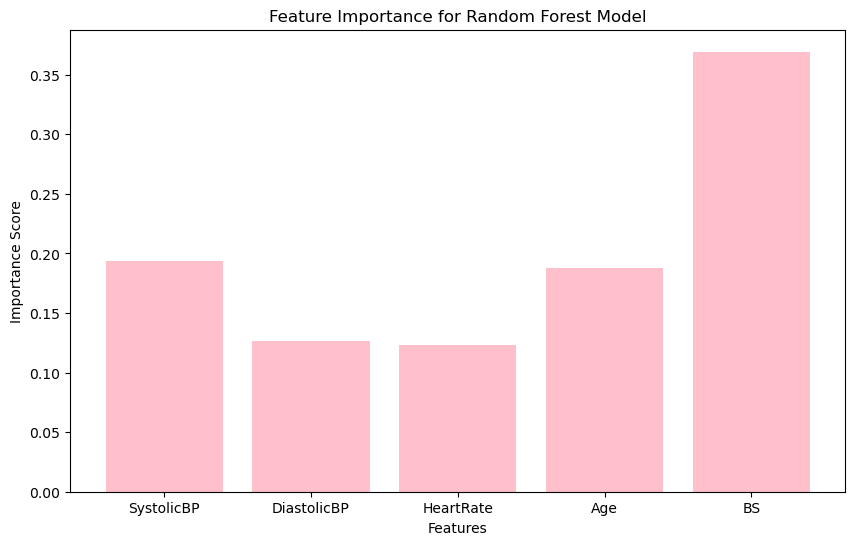

In [4]:
# random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

#training model 
rf_model.fit(X_train, y_train)

#save model with pickle file 
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

with open('label_encoder.pkl', 'wb') as le_file:
    pickle.dump(label_enc, le_file)

# get feature importance scores 
feature_importances = rf_model.feature_importances_

for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances, color='pink')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance for Random Forest Model')
plt.show()

#predictions
y_pred = rf_model.predict(X_test)

#convert risk level back to categorical values 
y_pred_original = label_enc.inverse_transform(y_pred)
y_test_original = label_enc.inverse_transform(y_test)

Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

   high risk       0.87      0.85      0.86        47
    low risk       0.86      0.80      0.83        80
    mid risk       0.77      0.84      0.81        76

    accuracy                           0.83       203
   macro avg       0.84      0.83      0.83       203
weighted avg       0.83      0.83      0.83       203



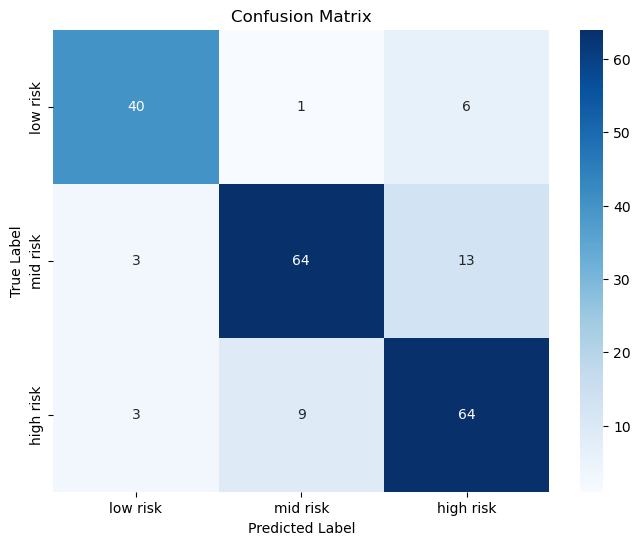

In [7]:
# check accuracy 
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("Classification Report:")
print(classification_report(y_test_original, y_pred_original))

#confusion matrix 
cm = confusion_matrix(y_test_original, y_pred_original)
# order the categories
class_order = ['low risk', 'mid risk', 'high risk']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_order, yticklabels=class_order)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [6]:
with open('random_forest_model.pkl', 'rb') as model_file:
    rf_model = pickle.load(model_file)

with open('label_encoder.pkl', 'rb') as le_file:
    label_enc = pickle.load(le_file)